In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
import datetime
import import_ipynb
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, precision_score, recall_score
import warnings
warnings.filterwarnings("ignore")

%run '/Users/pruthvi/Desktop/Pace University/4 Semester - Fall 2024/Capstone Project/Customer Churn Prediction/1. data_preprocessing.ipynb'

Number of features/columns: 14
Number of observations/rows: 10000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
Number of customers Exited: 

# Model Building

In [2]:
# Build Model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)), # Hidden layer 1 
    Dense(32, activation='relu'), # Hidden layer 2
    Dense(1, activation='sigmoid') # Op layer
])

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                832       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2945 (11.50 KB)
Trainable params: 2945 (11.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [4]:
optz = tf.keras.optimizers.Adam(learning_rate=0.01)
loss = tf.keras.losses.BinaryCrossentropy()

In [5]:
# Compile the model
model.compile(optimizer=optz, loss=loss, metrics=['accuracy'])

# TensorBoard

In [6]:
# Set up tensorboard

from tensorflow.keras.callbacks import EarlyStopping, TensorBoard

log_dir = 'logs/fit'
tensorflow_callback=TensorBoard(log_dir=log_dir,histogram_freq=1)

In [7]:
# Set up Early Stopping
early_stopping_callback=EarlyStopping(monitor='val_loss', patience=100, restore_best_weights=True)

# Train Model

In [8]:
history=model.fit(
    X_train, y_train, 
    validation_data = (X_test, y_test),
    epochs=50,
    callbacks=[tensorflow_callback, early_stopping_callback]
)

Epoch 1/50
250/250 [==============================] - 0s 750us/step - loss: 0.4039 - accuracy: 0.8329 - val_loss: 0.3566 - val_accuracy: 0.8545
Epoch 2/50
250/250 [==============================] - 0s 439us/step - loss: 0.3523 - accuracy: 0.8546 - val_loss: 0.3582 - val_accuracy: 0.8495
Epoch 3/50
250/250 [==============================] - 0s 429us/step - loss: 0.3482 - accuracy: 0.8585 - val_loss: 0.3644 - val_accuracy: 0.8520
Epoch 4/50
250/250 [==============================] - 0s 434us/step - loss: 0.3467 - accuracy: 0.8575 - val_loss: 0.3342 - val_accuracy: 0.8645
Epoch 5/50
250/250 [==============================] - 0s 430us/step - loss: 0.3402 - accuracy: 0.8594 - val_loss: 0.3366 - val_accuracy: 0.8610
Epoch 6/50
250/250 [==============================] - 0s 428us/step - loss: 0.3372 - accuracy: 0.8652 - val_loss: 0.3538 - val_accuracy: 0.8560
Epoch 7/50
250/250 [==============================] - 0s 433us/step - loss: 0.3331 - accuracy: 0.8645 - val_loss: 0.3437 - val_accuracy:

In [9]:
 # Save model
model.save('model.h5')

# Load TensorBoard

In [10]:
%load_ext tensorboard

In [11]:
%tensorboard --logdir logs/fit

# Model Evaluation

## Classification report

In [12]:
# Generate predictions
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=["Non-Churn", "Churn"]))


63/63 [==============================] - 0s 246us/step
Classification Report:
               precision    recall  f1-score   support

   Non-Churn       0.88      0.95      0.91      1607
       Churn       0.69      0.49      0.57       393

    accuracy                           0.86      2000
   macro avg       0.79      0.72      0.74      2000
weighted avg       0.84      0.86      0.85      2000



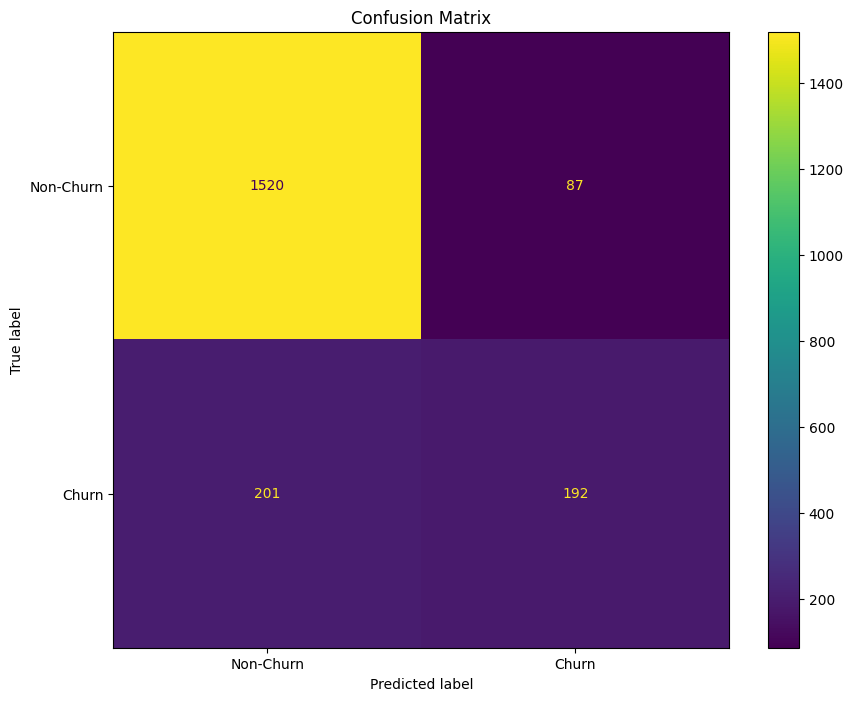

In [13]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a larger figure
fig, ax = plt.subplots(figsize=(10, 8))

# Display the confusion matrix with increased figure size and modified color
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Non-Churn", "Churn"])
disp.plot(cmap='viridis', ax=ax)  # You can change the colormap to any supported by matplotlib

plt.title("Confusion Matrix")
plt.show()


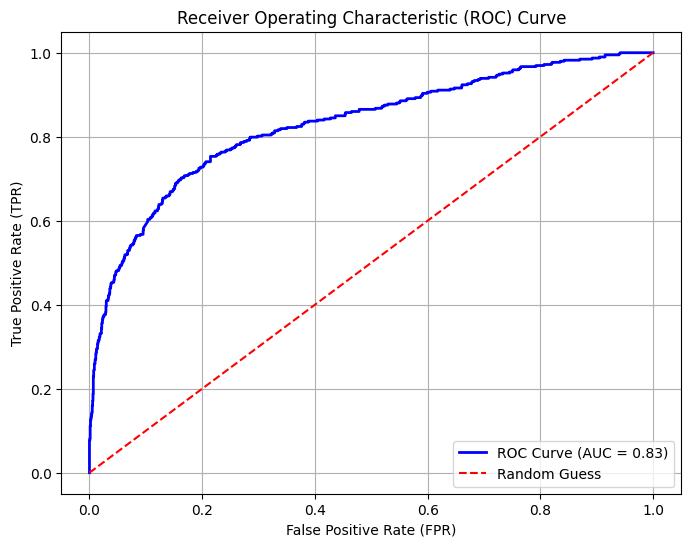

In [14]:
# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()